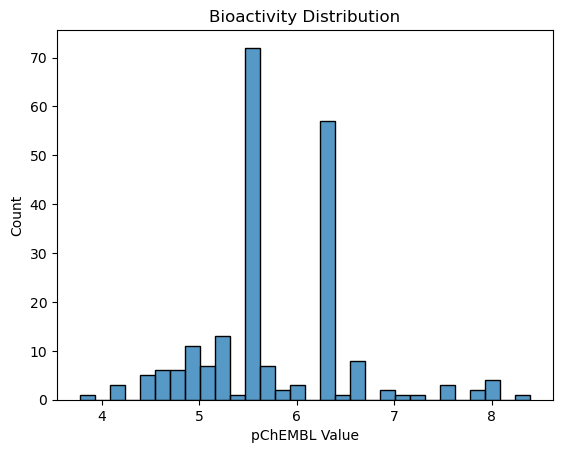

Random Forest - MSE: 0.49486631244584517, R2: 0.4129053301083454
SVM - MSE: 0.8535021673852039, R2: -0.012569578107347157


2025-05-05 01:40:56.230 
  command:

    streamlit run C:\Users\laksh\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-05 01:40:56.232 Session state does not function when running a script without `streamlit run`


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import streamlit as st

def fetch_chembl_data(target_id="CHEMBL4105728"):
    url = f'https://www.ebi.ac.uk/chembl/api/data/activity.json?target_chembl_id={target_id}&limit=1000'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()["activities"]
        df = pd.DataFrame(data)
        return df[['canonical_smiles', 'pchembl_value']].dropna()
    else:
        print("Error fetching data")
        return pd.DataFrame()

data = fetch_chembl_data()

def smiles_to_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return [
            Descriptors.MolWt(mol), Descriptors.TPSA(mol), 
            Descriptors.NumHAcceptors(mol), Descriptors.NumHDonors(mol)
        ]
    return [None, None, None, None]

data['Descriptors'] = data['canonical_smiles'].apply(smiles_to_descriptors)
data = data.dropna()
X = np.array(data['Descriptors'].tolist())
y = data['pchembl_value'].astype(float)

sns.histplot(y, bins=30)
plt.title("Bioactivity Distribution")
plt.xlabel("pChEMBL Value")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')
print(f'SVM - MSE: {mse_svm}, R2: {r2_svm}')

joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")

def predictor_app():
    st.title("Bioactivity Predictor for cGAS")
    model_choice = st.selectbox("Select Model", ["Random Forest", "SVM"])
    smiles = st.text_input("Enter SMILES:")
    if smiles:
        desc = smiles_to_descriptors(smiles)
        if None in desc:
            st.error("Invalid SMILES")
        else:
            model = joblib.load("rf_model.pkl") if model_choice == "Random Forest" else joblib.load("svm_model.pkl")
            pred = model.predict([desc])[0]
            st.success(f"Predicted Bioactivity (pChEMBL): {pred}")

if __name__ == '__main__':
    predictor_app()


In [3]:
!jupyter nbconvert --to script app.ipynb


[NbConvertApp] Converting notebook app.ipynb to script
[NbConvertApp] Writing 2853 bytes to app.py


In [9]:
C:\Users\laksh\anaconda\Lib\site-packages\ipykernel_launcher.py 

SyntaxError: unexpected character after line continuation character (487234994.py, line 1)